# Session 4 Forcasting with Decision Trees

This session covers how to use a descision tree in python to predict a binary outcome, using the `SK Learn` wrokflow. The primary goal her is to outline the process and workflow to utilising a decision tree in python and as a result the explanation around the actual machine learning is mininmal.  For a more iundepth intreduction to and explenation os decision trees, see: https://developers.google.com/machine-learning/decision-forests/decision-trees. 

Decision trees follow a flowchart-like structure with nodes for features and a branch for a decision/rule, where leaves from the nodes represent outcomes.

The process for making decision tree algorithms:

* Select attributes to split records
* Use the attribute as a decision node to break data into smaller subsets
* Keep building trees until: all tuples belong to the same attribute value, there are no more remaining attributes, there are no more instances We need to use Attribute Selection Measures (ASM) to help split attributes, they provide a score to tell us how well our splits work.


Here we will use a diabtetes dataset that includes anobver of health indicators. In this case the outcome we are intested in is wheather a person does or does not have diabetes, teh other indicators will eb used to try and make tghis prediction. 

### Set up 
We load in the standard packages for manipulting dataframe and statistics as well as a number of specific packedges from within `Sci-Kit Learn` for the actual machine learning.

In [7]:
# Standard libraries
import pandas as pd 
import numpy as np 

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Imputator 
from sklearn.impute import SimpleImputer

### Loading the data 

In the dataset we are loading the column names in row one which will mess teh data up. Instead we can skip over the first row and specify the column names taht we want using a list.

In [8]:
# Create a list of column names - this will make indexing easier 
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

df = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv',
                 names=col_names,
                 skiprows=1)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Imputation

In this dataset missing values have been coded as 0. However this creates a problem as it doesnt make sense as the column shoould not have a 0 e.g., someone would neot have a blood pressure of 0. If we left tehse in the model woul interpret the score as 0 which will through off our prediction.

To avoid this we will imputate the missing values - that is imput a predicted value instead. In this case we will simply imputate missing values with the mean $\bar{X}$. There are more complicated and technical methods of imputaion however I will not go into them here, for a more detailed explenations see: https://scikit-learn.org/stable/modules/impute.html. 



In [9]:
# Initialise the imputator 
imp = SimpleImputer(strategy='mean')

# Select the columns were interested in (the predictors)
error_cols = col_names[1:-1]

# The imputation won't work with 0s as it thinks they're real values, so we'll replace them with NAs.
# Replace with nan which is missing data with a float class
df[error_cols] = df[error_cols].replace(0, np.nan)


# Imputate the values with the column mean. The value function returns the actual value rather than the column,
# while the reshape pivotes the row to a column
df['skin'] = imp.fit_transform(df['skin'].values.reshape(-1,1))

# To imputate the vale
# Rather than repeating tghis we can loop over each column 
for column in error_cols:
    df[column] = imp.fit_transform(df[column].values.reshape(-1,1))

df



,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1


# Training and Testing Our Model 

As always, let's select our X (independent) and y (dependent) variables
Using the [] slicing notation we can take all but the last column as a list, and then use that to select our df columns

In [10]:
# Index the names for the independat variables 
features = col_names[0:-1]

# Vaiable Assignment 
X = df[features]
y = df['label']

# Train Test Split data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=1)

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()  

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Confusion Matrix 

We can create a confussion matric to summarise our results using the metrix library in SK Learn, however we will aslo neer to load `matliplot.pyplot` and `seaborn` to plot the results visually.

Text(0.5, 1.0, 'Confusion Matrix')

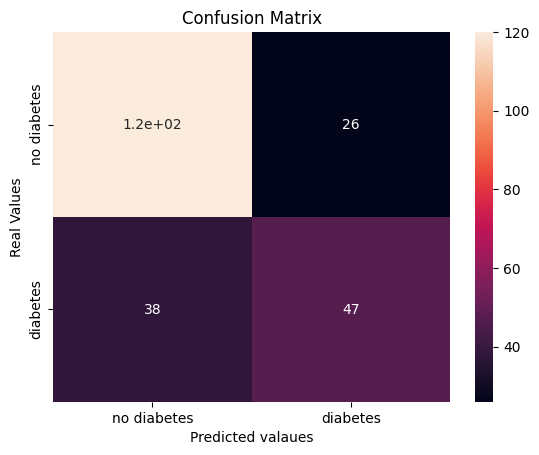

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

#  Create a confusion matrix usimng out test dataset and predicted values 
cm = metrics.confusion_matrix(y_test, y_pred)

# Create our labels 
target_values = ['no diabetes', 'diabetes']

# Create a heatmap to visualise the confussion matrix 
sns.heatmap(cm, 
            annot=True,
            xticklabels=target_values,
            yticklabels=target_values)

plt.xlabel('Predicted valaues')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')

Precision: Percentage of correct positive predictions relative to total positive predictions.

Recall: Percentage of correct positive predictions relative to total actual positives.

F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

In [13]:
print(f'Diabetes precision {51/85*100}')
print(f'Diabetes recall {51/78*100}')
print(f'No Diabetes precision {120/154*100}')
print(f'No Diabetes recall {120/151*100}')
 

Diabetes precision 60.0
Diabetes recall 65.38461538461539
No Diabetes precision 77.92207792207793
No Diabetes recall 79.47019867549669


As we can see, we are pretty good at predicting no diabetes, and better than a coin flip at predicting diabetes, but maybe we'd be better off over predicting diabetes in a practical sense?

Fortunately, when fitting a classification model in Python we can use the classification_report() function from the sklearn library to generate all three of these metrics.

The following example shows how to use this function in practice.

(from: https://www.statology.org/sklearn-classification-report/)

In [14]:
from sklearn.metrics import classification_report

output_report = classification_report(y_test,y_pred, target_names=target_values,
                                      output_dict=True)
output_report 

# We can see from this report that the model is pretty good at predicting that people do not have diabetes,
 # but pretty poor at determining if people do have diabetes

{'no diabetes': {'precision': 0.759493670886076,
  'recall': 0.821917808219178,
  'f1-score': 0.7894736842105263,
  'support': 146.0},
 'diabetes': {'precision': 0.6438356164383562,
  'recall': 0.5529411764705883,
  'f1-score': 0.5949367088607594,
  'support': 85.0},
 'accuracy': 0.7229437229437229,
 'macro avg': {'precision': 0.701664643662216,
  'recall': 0.6874294923448832,
  'f1-score': 0.6922051965356428,
  'support': 231.0},
 'weighted avg': {'precision': 0.7169355123230623,
  'recall': 0.7229437229437229,
  'f1-score': 0.7178908144930797,
  'support': 231.0}}

At this point we had to `pip install` two packedges. For the secont it also needs to be `conda installed` however it is mysterious why: 
* pip install pydotplus
* pip install graphviz
* conda install graphviz  (no one know why)

In [15]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image
import pydotplus

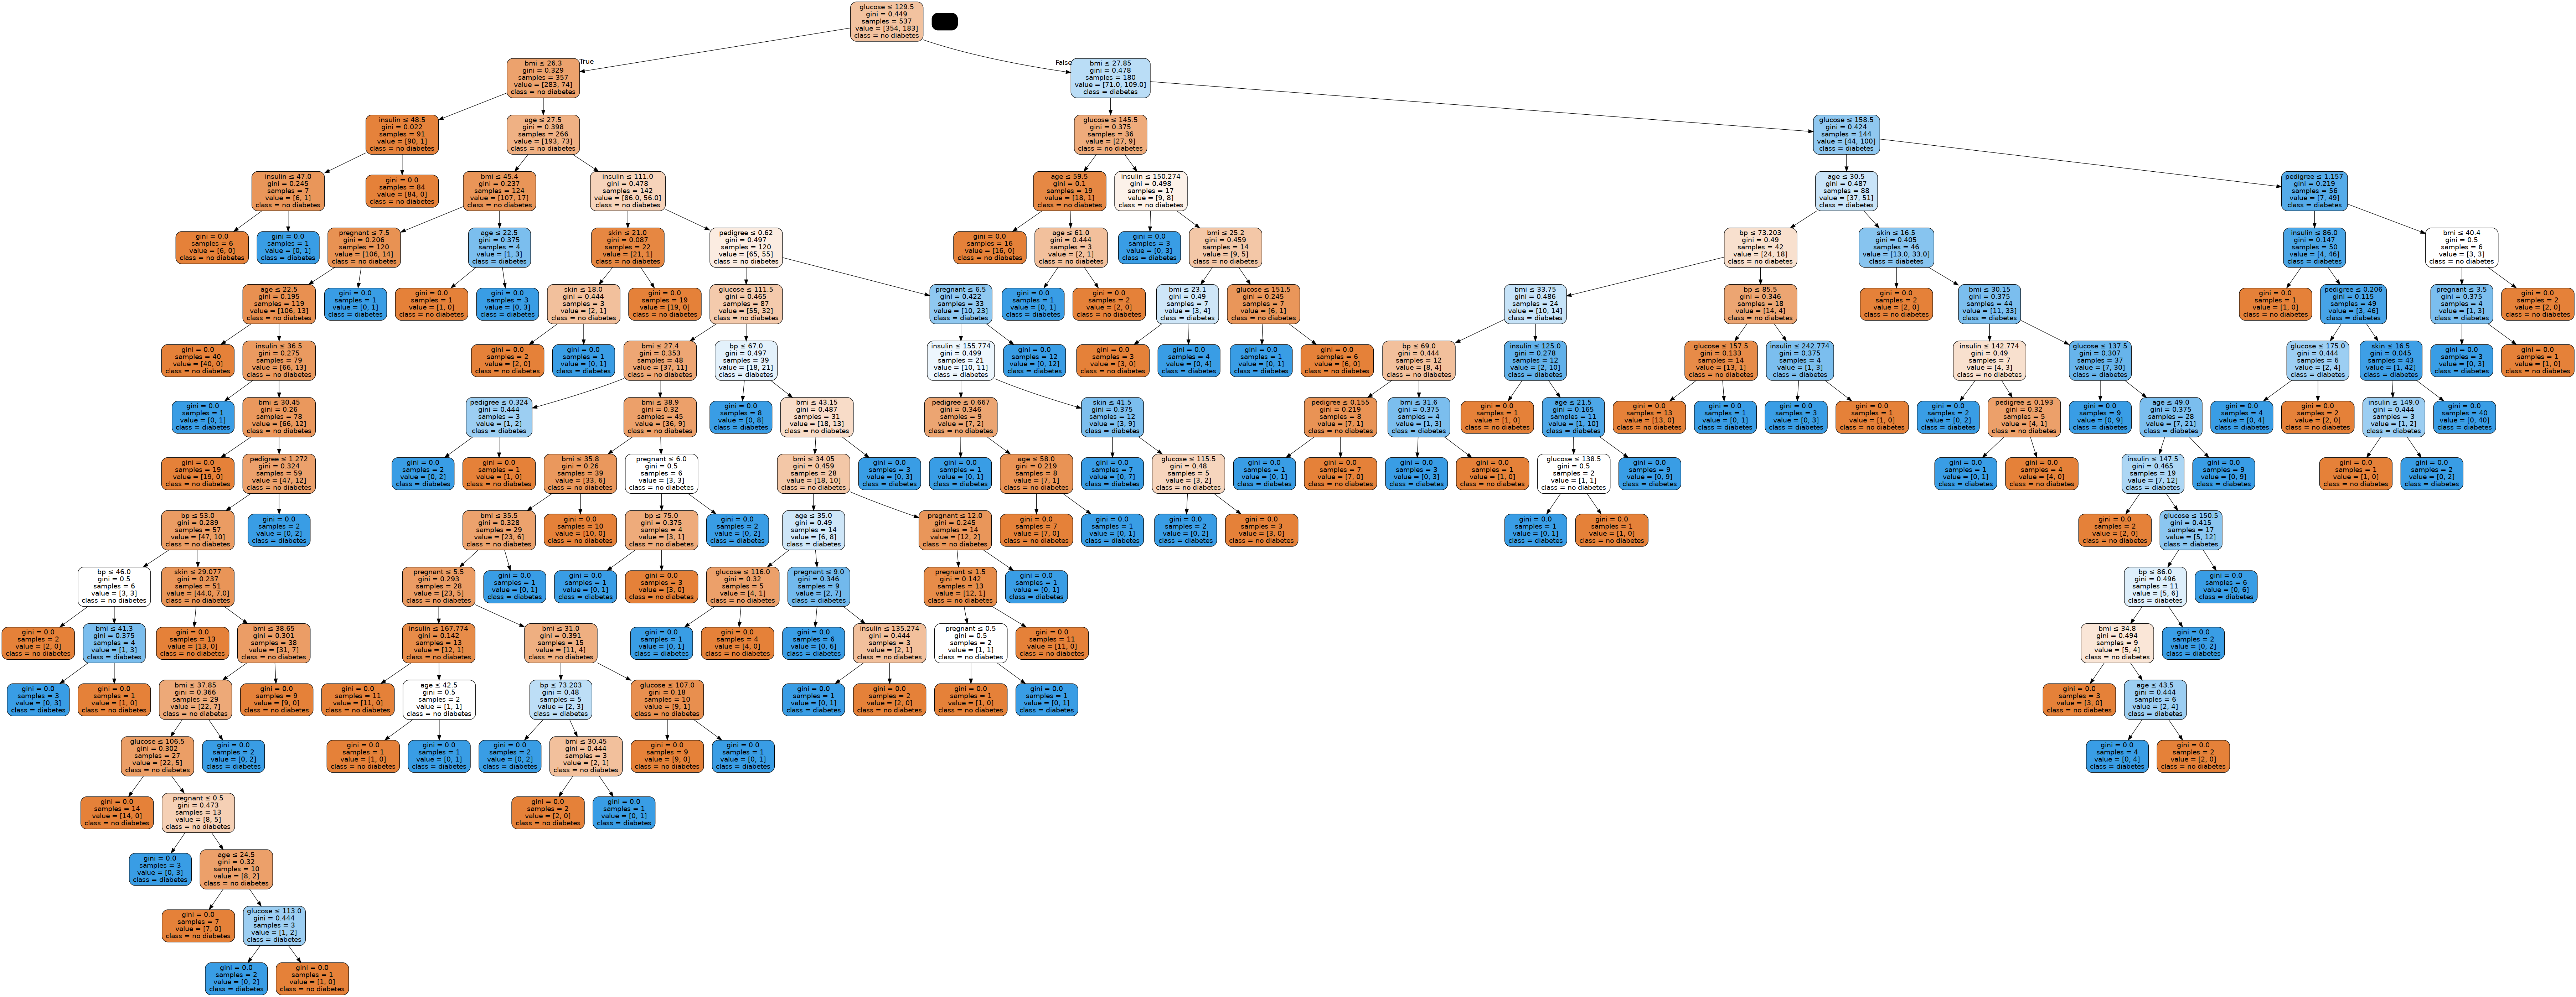

In [16]:
# Initialise a String Io Object
dot_data = StringIO()

# Create our Decision Trea Graphic
export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=target_values)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Plot Graph as a PNG
Image(graph.create_png())

Every time the model make a chaince (split) it does one that gets the smallest gini value (which is the ratio of one group to the other). 0.5 would be an even splt.

The model is ovefit as it has kept going untill it gets to pure nodes (i.e., all are one or the oother)

To make it more useful and avoid over fitting we will reduce the depth of our model

This is the initial tree generated by our ML algorithm. The gini number is how 'pure' the node is, that is, if all its records belong to the same class (such as is the case for leaf nodes). So if it has a gini of 0, all values are of the same type (eg no diabetes). The default for the sklearn decision tree algorythm is to use gini as a splitting factor, as in, it will split each node on which values produces the greatest change in gini, as in, which splitting value puts the highest proportion of each type of outcome on either side of the split. Ideally, it'd find a split to put all diabetes one side, and all non-diabetes the other, but it does its best to make the diabetes:non-diabetes, and non-diabetes:diabetes ratios the biggest it can.

This plot is pretty uninteligible though, so we are going to do some work to make it make sense.

To improve tree performance we can use three arguments: `criterion`, `splitter`, and `max_depth`. These, retrospectively: let us choose attribute measuers (gini as standard, also possible are gain ratio and information gain (google these to understand them)), choose the split strategy (between best split and random split), and the maximum depth of the tree (which can fix over/underfitting).

Let's prune the tree by redoing the calculations, but with different arguments:

In [17]:
# Create Decision Tree classifer object, specifying the depth annd the citerion to entropy
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


Text(0.5, 1.0, 'Confusion Matrix')

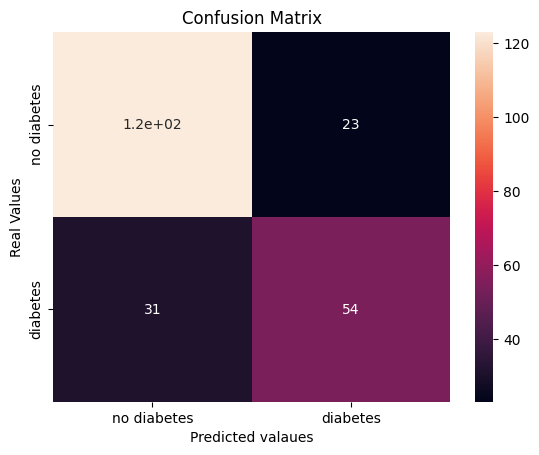

In [18]:
# New Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)

target_values = ['no diabetes', 'diabetes']

sns.heatmap(cm, 
            annot=True, # annotoe 
            xticklabels=target_values,
            yticklabels=target_values)

plt.xlabel('Predicted valaues')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')

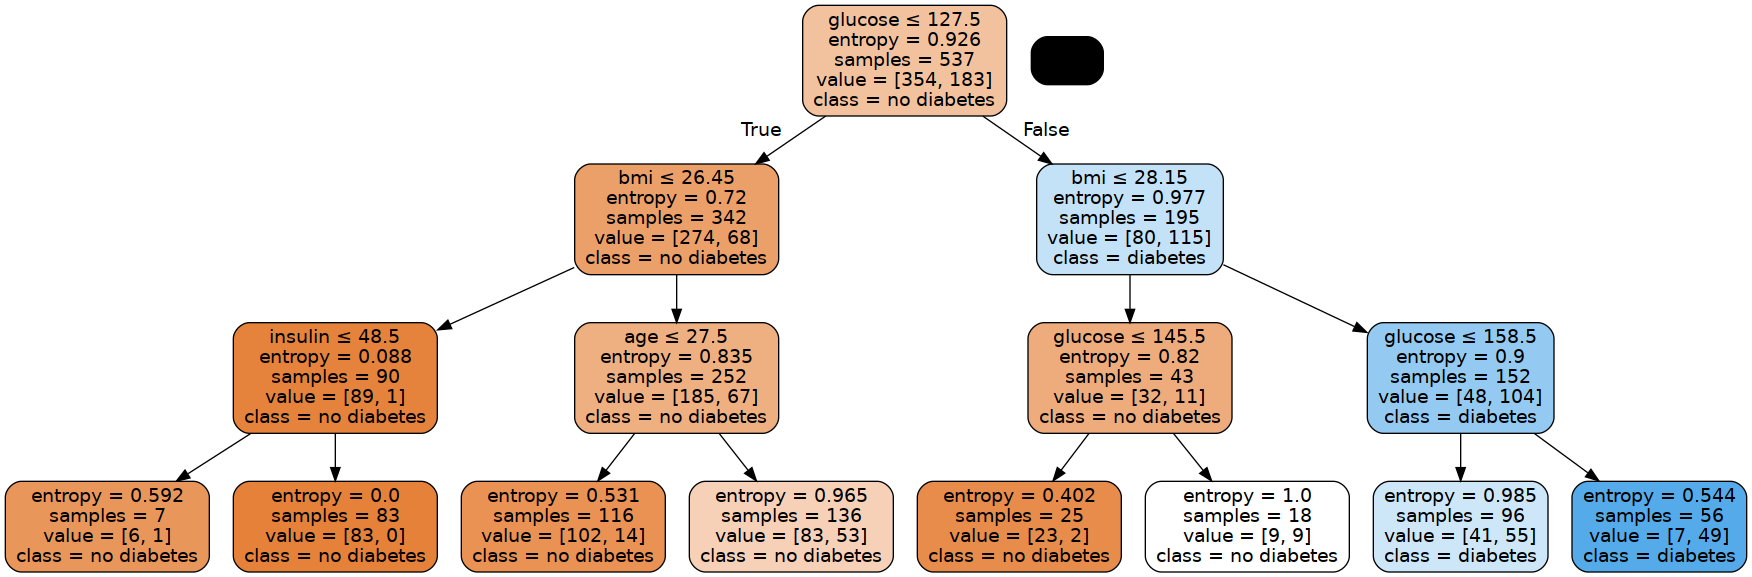

In [19]:
# New Decision Treee Graphic 

dot_data = StringIO()

export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=features,
                class_names=target_values)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

From this tree we can see that, according to the model, glucose over 127.5 predicts diabetes, further, in groups with glucose over 127.5, having a BMI of over 28.15 and a glucose of over 158.5 predicts diabetes, but a BMI over 28.15 and a glucose under 145.5 does not.

First off: the saturation of the colours of a node is an indication of higher predicted target values, of the samples in a node, what proportion of them end up being the outcome indicated by the node (so, if the node predicts no diabetes and 93 of the samples in that node do not have diabetes, and 3 do, it’ll be a saturated orange indicating, essentially, that most of the samples in that cell are in agreement with the prediction of the cell).

There were also two ways we looked at for what the model should prioritise in making the decision tree: minimising gini index, or maximising information gain, which then got confusing as when we chose to maximise information gain, the measure we got was entropy.

First, gini index is essentially a way of measuring, when we use a node to split data somewhere, how good that value we chose to split at (say glucose <= 127.5) is at separating samples into diabetes and non-diabetes categories. It’s trying to maximise non-diabetes on one side of the split and diabetes on the other, whilst minimising diabetes on the first side of the split, and non-diabetes on the other. Gini index is essentially a measure of this, and when we use gini index as a hyperparameter in our model, it tries to maximise this split, leading to a lower gini index. If the index was 0, for instance, that would mean that all of one of our outcomes will go into one side of the split.

The second attribute selection measure we looked at was entropy. Entropy is a measure of how homogenous the samples in a node are, or how random the samples in the node are. It can be though of as how messy the data is in a given node, or how much information our node gives us about the outcomes we want to predict. High entropy means the system is messy and doesn’t give us a lot of information about a prediction. When we use entropy as our splitting criteria, which we did for the second plot, this choses to split nodes will maximise the decrease in average entropy between nodes (this difference in average entropy is called information gain). Essentially then, when choosing entropy as our attribute selection method, we split nodes where, after that split, we have a more homogenous set of samples, which can be though of as having a better set of samples from which to make a prediction.